In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing face mask detection dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 96% 156M/163M [00:01<00:00, 97.5MB/s]
100% 163M/163M [00:01<00:00, 110MB/s] 


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Import the libraries

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files=os.listdir('/content/data/with_mask') # contain all the data with mask
without_mask_files=os.listdir('/content/data/without_mask') # contain all the data without mask

In [8]:
with_mask_files[0:5]

['with_mask_1397.jpg',
 'with_mask_3563.jpg',
 'with_mask_408.jpg',
 'with_mask_1513.jpg',
 'with_mask_2352.jpg']

In [9]:
without_mask_files[0:5]

['without_mask_179.jpg',
 'without_mask_2956.jpg',
 'without_mask_3483.jpg',
 'without_mask_901.jpg',
 'without_mask_3169.jpg']

In [10]:
len(with_mask_files)

3725

In [11]:
len(without_mask_files)

3828

Create labels for the two class images

with mask --> 1

without mask -->0

In [12]:
# create the labels

with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [13]:
with_mask_labels[0:5]

[1, 1, 1, 1, 1]

In [14]:
without_mask_labels[0:5]

[0, 0, 0, 0, 0]

In [15]:
# combining the list

labels=with_mask_labels+without_mask_labels
labels[0:5]

[1, 1, 1, 1, 1]

In [16]:
len(labels)

7553

Displaying the images

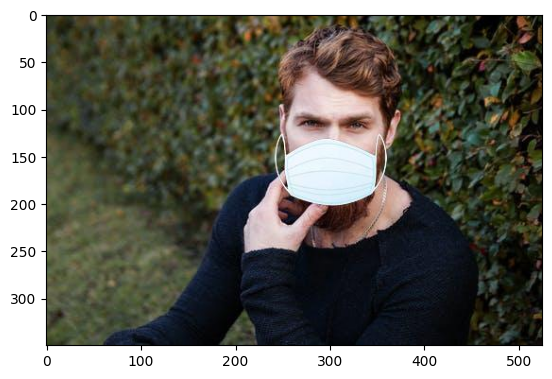

In [17]:
# displaying the mask image

img=mpimg.imread('/content/data/with_mask/with_mask_1.jpg')
imgplot=plt.imshow(img)
plt.show()

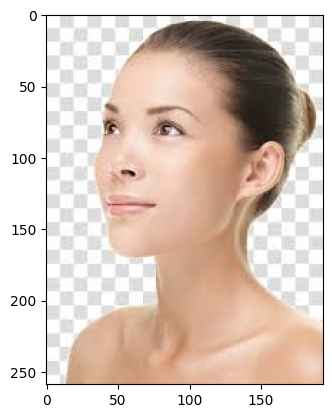

In [18]:
# displaying the without mask image

img=mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot=plt.imshow(img)
plt.show()

Image Processing

In [19]:
# Resize the images
# convert the images into numpy array

with_mask_path='/content/data/with_mask/'

data=[]

for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB') # because I want image in coloured form
  image=np.array(image)
  data.append(image)


without_mask_path='/content/data/without_mask/'

for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB') # because I want image in coloured form
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
len(data)

7553

In [21]:
data

[array([[[ 72,  69,  62],
         [ 74,  71,  64],
         [ 79,  76,  68],
         ...,
         [ 50,  53,  60],
         [ 54,  58,  65],
         [ 58,  62,  71]],
 
        [[ 68,  65,  58],
         [ 71,  68,  61],
         [ 78,  75,  67],
         ...,
         [ 52,  55,  62],
         [ 52,  56,  63],
         [ 52,  55,  64]],
 
        [[ 71,  68,  61],
         [ 71,  68,  62],
         [ 75,  72,  65],
         ...,
         [ 49,  52,  59],
         [ 51,  54,  62],
         [ 54,  56,  66]],
 
        ...,
 
        [[188, 152, 121],
         [184, 149, 116],
         [186, 151, 118],
         ...,
         [ 31,  35,  38],
         [ 29,  35,  38],
         [ 29,  36,  38]],
 
        [[190, 154, 122],
         [190, 154, 122],
         [192, 157, 123],
         ...,
         [ 32,  36,  39],
         [ 30,  36,  39],
         [ 28,  36,  38]],
 
        [[196, 160, 128],
         [195, 159, 127],
         [193, 158, 124],
         ...,
         [ 34,  38,  41],
  

In [22]:
type(data[0])

numpy.ndarray

In [23]:
data[0].shape # (height,width,3 means colored image)

(128, 128, 3)

In [24]:
# converting image list and label list into numpy arrays

X=np.array(data)
y=np.array(labels)

In [25]:
type(X)

numpy.ndarray

In [26]:
type(y)

numpy.ndarray

In [27]:
print(X.shape) # (no. of numpy arrays,height,width,rgb channel)

(7553, 128, 128, 3)


In [28]:
print(y.shape) # labels

(7553,)


In [29]:
print(y)

[1 1 1 ... 0 0 0]


Spliting the data into Train test split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [31]:
print(X_train.shape)

(6042, 128, 128, 3)


Scaling the data

In [32]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[159, 190, 212],
        [148, 184, 209],
        [157, 190, 213],
        ...,
        [177, 218, 254],
        [175, 218, 255],
        [179, 222, 255]],

       [[148, 184, 210],
        [152, 186, 211],
        [165, 196, 221],
        ...,
        [177, 217, 254],
        [176, 218, 255],
        [180, 222, 255]],

       [[150, 186, 211],
        [157, 190, 216],
        [170, 200, 226],
        ...,
        [176, 216, 254],
        [176, 218, 255],
        [181, 222, 255]]], dtype=uint8)
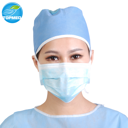

In [33]:
X_train[0]

In [34]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.62352941, 0.74509804, 0.83137255],
        [0.58039216, 0.72156863, 0.81960784],
        [0.61568627, 0

Building CNN

In [35]:
import tensorflow as tf
from tensorflow import keras

In [36]:
num_of_classes=2

model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu')) # 128 neurons

model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes,activation='sigmoid')) # sigmoid for classification, softmax for multiclass classification.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
# compile the neural network

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc']) # for one hot encoder label use categorical crossentropy, for numerical encoder label use sparse.....

In [38]:
# training the neural network

history=model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 160s 933ms/step - acc: 0.7495 - loss: 0.8091 - val_acc: 0.8810 - val_loss: 0.2883
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 196s 894ms/step - acc: 0.8961 - loss: 0.2625 - val_acc: 0.8942 - val_loss: 0.2467
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 201s 890ms/step - acc: 0.9276 - loss: 0.2033 - val_acc: 0.9041 - val_loss: 0.2096
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 203s 897ms/step - acc: 0.9259 - loss: 0.1881 - val_acc: 0.9174 - val_loss: 0.2028
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 200s 888ms/step - acc: 0.9598 - loss: 0.1256 - val_acc: 0.9124 - val_loss: 0.2019


Model Evaluation

In [39]:
loss,accuracy=model.evaluate(X_test_scaled,y_test)
print('Test Accuracy =',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 290ms/step - acc: 0.9261 - loss: 0.1793
Test Accuracy = 0.9265387058258057


In [ ]:
h=history

# plot the loss value

plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value

plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()

Predictive System

Enter the image path/content/test.jpg


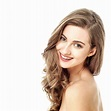

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[[0.42274842 0.8479478 ]]
1
The person in the image is without mask


In [41]:
input_image_path=input('Enter the image path')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resize=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resize/255

input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])

input_prediction=model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label==1:
  print('The person in the image is without mask')
else:
  print('The person in the image is with mask')